 Optimal number of segments is: 6


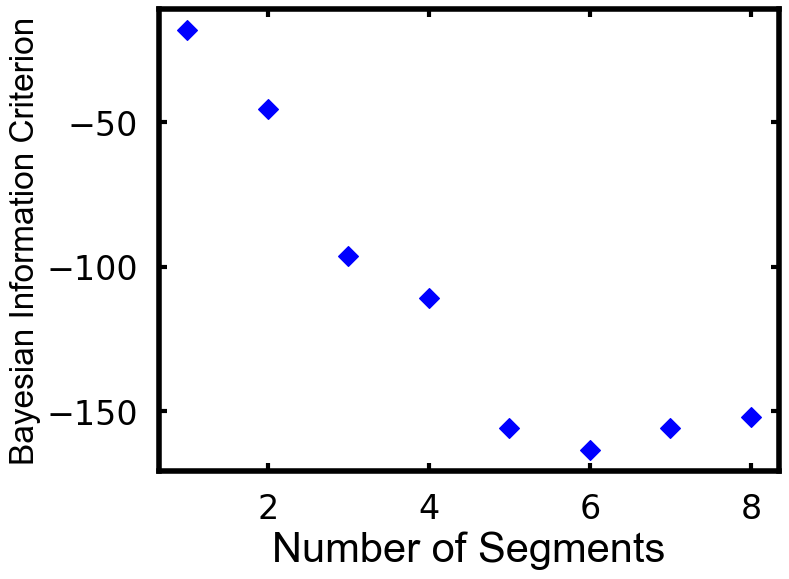

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import pwlf  # Piecewise linear regression library

# Define directories for data loading and saving
workdir = 'Q:/My Drive/Characterization/F8T2/' #Copy and paste directory

# Loading the data
data = pd.read_excel(workdir + 'peak analysis.xlsx', header=None) #Excel file for lambda1, lambda2, lambdamax

# Max number of segments to test, modify upon your need
max_segments = 8

# Read and clean data
x = pd.to_numeric(data.iloc[1:, 0], errors='coerce').values  # Temperature (°C)
y = pd.to_numeric(data.iloc[1:, 2], errors='coerce').values  # Wavelength, change here lambda1, lambda2, lambdamax

# Remove NaN values
mask = ~np.isnan(x) & ~np.isnan(y)
x = x[mask]
y = y[mask]

# Define BIC calculation
def compute_bic(x, y, num_segments):

    #Compute Bayesian Information Criterion (BIC) for a given number of breakpoints.
    pwlf_model = pwlf.PiecewiseLinFit(x, y)
    breakpoints = pwlf_model.fit(num_segments)

    # Compute Sum of Squared Residuals (SSR)
    ssr = pwlf_model.ssr

    # Compute BIC
    n = len(x)  # Number of data points
    k = (num_segments-1) + 2 * num_segments  # Breakpoints + (2 * segments)
    bic = n * np.log(ssr / n) + k * np.log(n) # Equattion for BIC calculation
    
    return bic, ssr, breakpoints, pwlf_model

# BIC optimizaion
bic_values = []
ssr_values = []
models = []

# Plot set up
plt.figure(figsize=(8, 6))
plt.rcParams['axes.linewidth'] = 4

# Font settings
font_1 = FontProperties(family='Arial', style='normal', size=30)
font_2 = FontProperties(family='Arial', weight='normal', size=24)

for num_segments in range(1, max_segments + 1):
    bic, ssr, breakpoints, model = compute_bic(x, y, num_segments)
    bic_values.append(bic)
    ssr_values.append(ssr)
    models.append((breakpoints, model))

# Find the optimal number of segments
optimal_index = np.argmin(bic_values)
optimal_num_segments = optimal_index + 1
optimal_breakpoints, optimal_model = models[optimal_index]

print(f" Optimal number of segments is: {optimal_num_segments}")

# Save the optimization values to excel files
results_df = pd.DataFrame({
    'Number of Segments': list(range(1, max_segments + 1)),
    'BIC': bic_values,
    'SSR': ssr_values
})
#results_df.to_excel(workdir + 'BIC optimization.xlsx', index=False)

# Plot the BIC versus number of segments
plt.scatter(range(1, max_segments + 1), bic_values, marker='D', s =100, color='blue')
plt.xlabel('Number of Segments', fontproperties=font_1)
plt.ylabel('Bayesian Information Criterion', fontproperties=font_2)
plt.tick_params(axis='both', which='major', labelsize=24, labelcolor='black', length=6,
                width=3, pad=15, direction='in', bottom=True, top=True, left=True, right=True)
#plt.savefig(workdir + 'BIC_optimization.jpeg', dpi=500, bbox_inches='tight')
plt.show()
